# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تبدیل Perspective در OpenCV</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای تبدیل پرسپکتیو  (perspective transformation)، به یک ماتریس تبدیل 3x3 نیاز دارید. در این تبدیل خطوط مستقیم پس از تغییر شکل مستقیم باقی خواهند ماند. 
<br/>
برای یافتن ماتریس تبدیل، به 4 نقطه روی تصویر ورودی و نقاط مربوطه مد نظر در تصویر خروجی نیاز داریم. از بین این 4 نقطه، هیچ 3 تای آنها نباید در یک خط مستقیم باشند یا اصطلاحا نبایدcollinear باشند.
<br/>
ابتدا با تابع cv.getPerspectiveTransform ماتریس تبدیل را پیدا میکنیم و سپس با تابع  cv.warpPerspective  ماتریس تبدیل پیدا شده را روی تصویر اعمال میکنیم.

</div>


(<matplotlib.axes._subplots.AxesSubplot at 0x1d801f6f460>,
 Text(0.5, 1.0, 'Output'))

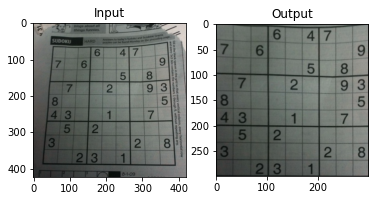

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/sudoku.jpg')
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

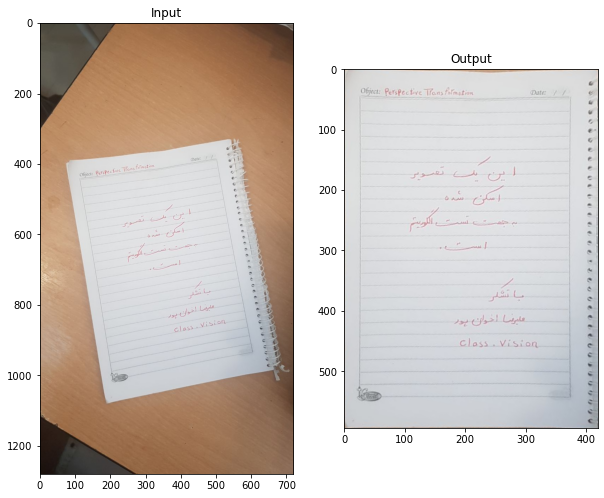

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/scan.jpg')

# Cordinates of the 4 corners of the original image
points_A = np.float32([[74,396], [540,329], [187,1080], [664,982]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))

cv2.imshow("result",warped)
cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=[10,15])
plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Input');
plt.subplot(122),plt.imshow(warped[...,::-1]),plt.title('Output');

In [3]:
M

array([[ 8.61619244e-01, -1.42343530e-01, -7.39178614e+00],
       [ 1.28808449e-01,  8.95891602e-01, -3.64304900e+02],
       [-7.95112545e-05,  6.57456692e-05,  1.00000000e+00]])

https://blog.class.vision/1396/12/affine-perspective-transformation/

There are other methods of image transformation. See the links below to read more
[Kabsch–Umeyama](https://zpl.fi/aligning-point-patterns-with-kabsch-umeyama-algorithm/) and [face alignment example](https://github.com/Alireza-Akhavan/deep-face-recognition/blob/master/8_face-align-with-landmarks.ipynb)